#### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support


### Importing the dataset

In [3]:
df = pd.read_csv('Dataset/parkinsons.csv')
df.head()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Statistical analysis

In [4]:
df.describe()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

### Individual Histogram for the numerical features

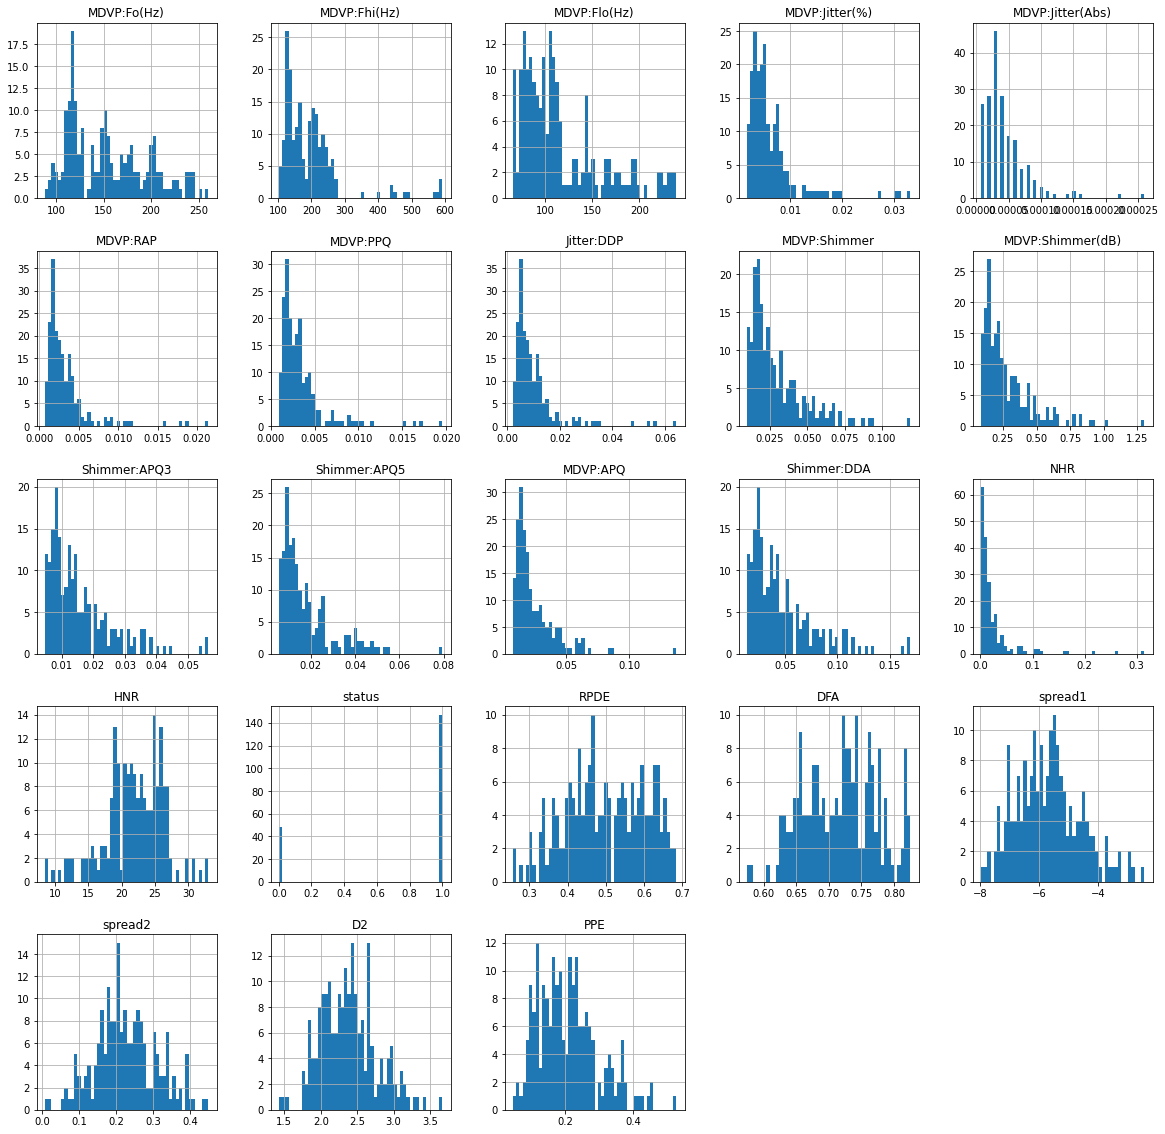

In [6]:

df.hist(bins=50, figsize=(20, 20))
plt.show()


### Individual Bar Chart for the categorical features

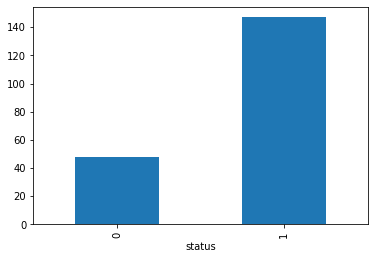

1    147
0     48
Name: status, dtype: int64

In [7]:

df.groupby('status').size()
df.groupby('status').size().plot(kind='bar')
plt.show()
df['status'].value_counts()


### Bar plot for Categorical vs categorical

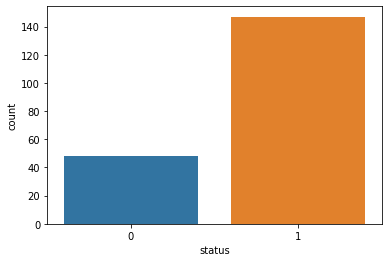

In [8]:
# Bar plot for Categorical vs categorical
sns.countplot(x='status', data=df)
plt.show()


### Categorical vs Numerical ( with different colors )

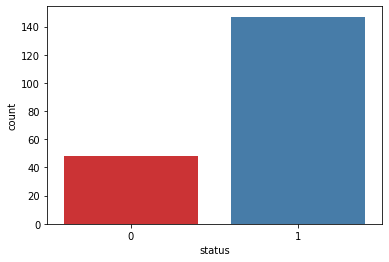

In [9]:
sns.countplot(x='status', data=df, palette='Set1')
plt.show()


### Numerical vs Numerical pairplot

In [10]:
sns.pairplot(df, hue='status', palette='Set1')
plt.show()


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001A5F09C3880> (for post_execute):


KeyboardInterrupt: 

### Missing data handling 

In [ ]:
df.isnull().sum()


name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### Stratified sampling on output feature

In [ ]:
df_train = df[df['status'] == 0]
df_test = df[df['status'] == 1]
print("Number of samples in training set:")
print(len(df_train))
print("Number of samples in testing set:")
print(len(df_test))
print("Number of features in the dataset:")
print(df.shape[1])
print("Number of features in the training set:")
print(df_train.shape[1])
print("Number of features in the testing set:")
print(df_test.shape[1])



Number of samples in training set:
48
Number of samples in testing set:
147
Number of features in the dataset:
24
Number of features in the training set:
24
Number of features in the testing set:
24


### One hot encoding for categorical features 

In [ ]:
# type of features in the dataset
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

##### Encoding the Categorical values into numerical values is not required in this dataset. Because all values we have floating type only. we have name column as a categorical values but we are not going to use that column in model prediction.

##### So no need to apply label encoding...

In [ ]:
df_train.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

###  Normalization / Standardization for numerical features

In [ ]:
# Normalization-MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz) using min-max normalization method using sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)']] = scaler.fit_transform(df_train[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)']])
df_train.head()



C:\Users\mosta\AppData\Local\Temp\ipykernel_16992\491946621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)']] = scaler.fit_transform(df_train[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)']])


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
30,phon_R01_S07_1,0.578023,0.195010,0.714252,0.00289,0.000010,0.00166,0.00168,0.00498,0.01098,...,0.01689,0.00339,26.775,0,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569
31,phon_R01_S07_2,0.592431,0.200477,0.714470,0.00241,0.000010,0.00134,0.00138,0.00402,0.01015,...,0.01513,0.00167,30.940,0,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501
32,phon_R01_S07_3,0.586773,0.212372,0.720614,0.00212,0.000010,0.00113,0.00135,0.00339,0.01263,...,0.01919,0.00119,30.775,0,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
33,phon_R01_S07_4,0.612770,0.204850,0.744722,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,...,0.01407,0.00072,32.684,0,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
34,phon_R01_S07_5,0.618916,0.204687,0.739148,0.00178,0.000009,0.00094,0.00106,0.00283,0.00958,...,0.01403,0.00065,33.047,0,0.340068,0.741899,-7.964984,0.163519,1.423287,0.044539


In [ ]:
# Standardization MDVP:Fo(Hz),MDVP:Fhi(Hz)MD,VP:Flo(Hz) using sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)']] = scaler.fit_transform(df_train[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)']])
df_train.head()


C:\Users\mosta\AppData\Local\Temp\ipykernel_16992\799748110.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)']] = scaler.fit_transform(df_train[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)']])


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
30,phon_R01_S07_1,0.290122,-0.174904,0.805749,0.00289,0.000010,0.00166,0.00168,0.00498,0.01098,...,0.01689,0.00339,26.775,0,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569
31,phon_R01_S07_2,0.331364,-0.147572,0.806368,0.00241,0.000010,0.00134,0.00138,0.00402,0.01015,...,0.01513,0.00167,30.940,0,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501
32,phon_R01_S07_3,0.315170,-0.088114,0.823791,0.00212,0.000010,0.00113,0.00135,0.00339,0.01263,...,0.01919,0.00119,30.775,0,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
33,phon_R01_S07_4,0.389587,-0.125715,0.892159,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,...,0.01407,0.00072,32.684,0,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
34,phon_R01_S07_5,0.407181,-0.126530,0.876352,0.00178,0.000009,0.00094,0.00106,0.00283,0.00958,...,0.01403,0.00065,33.047,0,0.340068,0.741899,-7.964984,0.163519,1.423287,0.044539


### Correlation matrix

In [ ]:
corr = df.corr()
corr


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


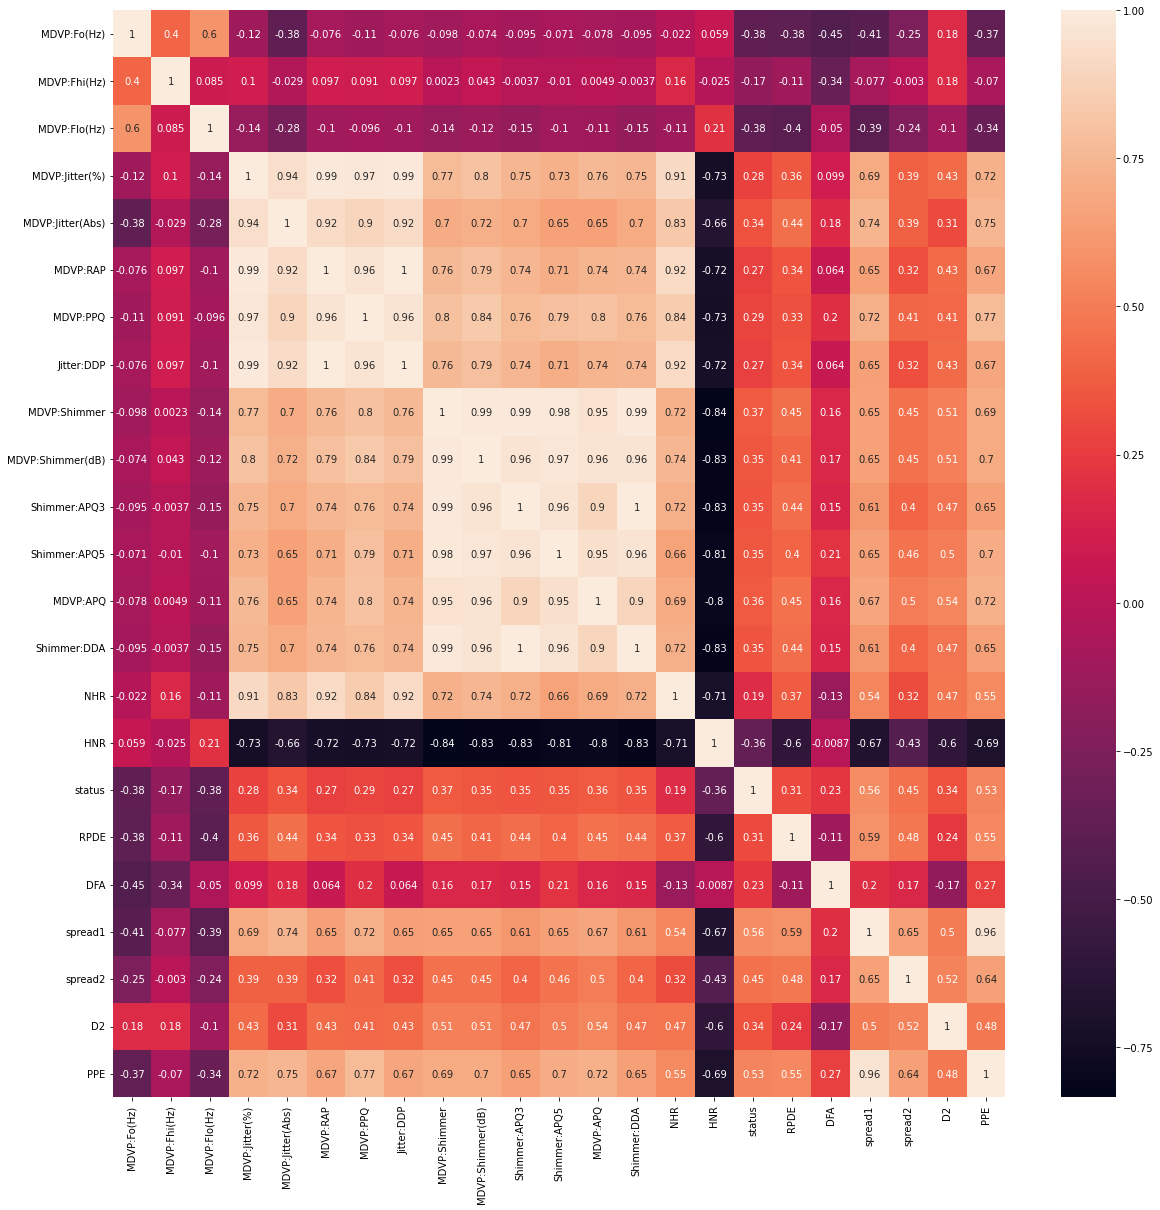

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)
plt.show()


### Dropping any feature if they seem extremely uncorrelated

In [ ]:
# Drop status column from the dataset
df.drop('status', axis=1, inplace=True)
df.drop('name', axis=1, inplace=True)
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Data balancing

##### Uder sampling

In [ ]:
pip install imblearn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Count the number of samples in each class
df['status'].value_counts()


1    147
0     48
Name: status, dtype: int64

##### So we see that the data is balanced perfectly.

#### The data is balanced perfectly. But because of teachers requirement i am going to balance the data using over sampling and under sampling.

In [ ]:
# Drop name column from the dataset
df.drop('name', axis=1, inplace=True)
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
# Over-sampling using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(df, df['status'])
X_res.shape, y_res.shape


((294, 23), (294,))

In [ ]:
# Under sampling
from typing import Counter
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(df, df['status'])
print(sorted(Counter(y_resampled).items()))

[(0, 48), (1, 48)]


In [ ]:
# Data Balance
df = pd.DataFrame(X_resampled, columns=df.columns)
df['status'] = y_resampled
df.head()

NameError: name 'X_resampled' is not defined

In [ ]:
# Print Balanced Data
df['status'].value_counts()


1    147
0     48
Name: status, dtype: int64

### Model building

#### SVM

In [12]:
# Split the data into train and test set
X = df.drop(columns=['name', 'status'], axis=1)
Y = df['status']

In [14]:
# SVM Classifier
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# accuracy 
svm_model = svm.SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, Y_train)
Y_pred = svm_model.predict(X_test)
print("Accuracy of SVM classifier on test set: {:.2f}".format(svm_model.score(X_test, Y_test)))
print("Accuracy of SVM classifier on train set: {:.2f}".format(svm_model.score(X_train, Y_train)))



Accuracy of SVM classifier on test set: 0.87
Accuracy of SVM classifier on train set: 0.87


In [ ]:
# import the metrics module for the confusion matrix
from tabulate import tabulate
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import r2_score
# print f1 ,rmse,mae, R2 , recall , Precision ,, train and test accuracy , in tabular format using tabulate
print(tabulate([['f1_score', f1_score(Y_test, Y_pred, average='weighted')], ['mean_squared_error', mean_squared_error(Y_test, Y_pred)], ['mean_absolute_error', mean_absolute_error(Y_test, Y_pred)], ['r2_score', r2_score(Y_test, Y_pred)], ['recall_score', recall_score(Y_test, Y_pred, average='weighted')], ['precision_score', precision_score(Y_test, Y_pred, average='weighted')]], headers=['Metrics', 'Value']))


Metrics                 Value
-------------------  --------
f1_score             0.857183
mean_squared_error   0.128205
mean_absolute_error  0.128205
r2_score             0.129464
recall_score         0.871795
precision_score      0.861355


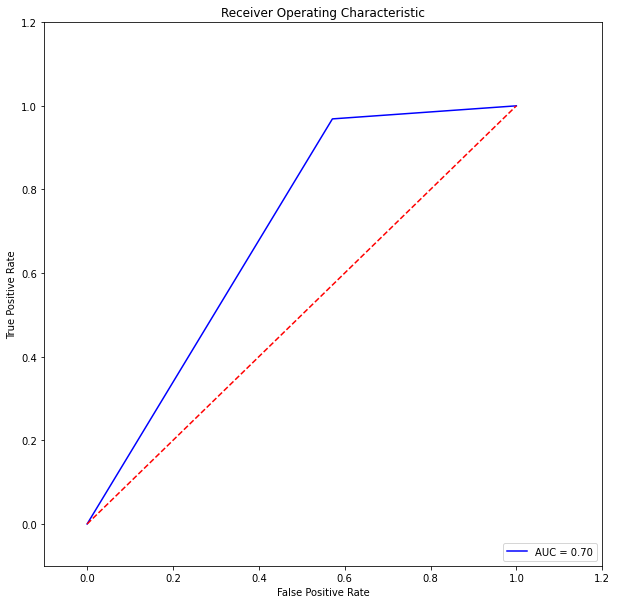

In [ ]:
#ROC for SVM
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


c:\Users\mosta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


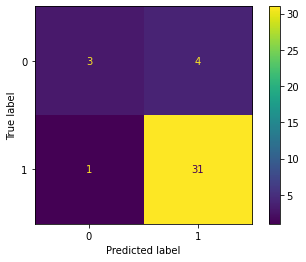

In [ ]:
#plot_confusion_matrix: Visualize confusion matrices
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm_model, X_test, Y_test, display_labels=[0, 1])
plt.show()



#### Logistic Regression Classifier

In [ ]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, Y_train)))



Accuracy of logistic regression classifier on test set: 0.90
Accuracy of logistic regression classifier on train set: 0.85


c:\Users\mosta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# For Logistic Regression
# import the metrics module for the confusion matrix
from tabulate import tabulate
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import r2_score
# print f1 ,rmse,mae, R2 , recall , Precision ,, train and test accuracy , in tabular format using tabulate
print(tabulate([['f1_score', f1_score(Y_test, Y_pred, average='weighted')], ['mean_squared_error', mean_squared_error(Y_test, Y_pred)], ['mean_absolute_error', mean_absolute_error(Y_test, Y_pred)], ['r2_score', r2_score(Y_test, Y_pred)], ['recall_score', recall_score(Y_test, Y_pred, average='weighted')], ['precision_score', precision_score(Y_test, Y_pred, average='weighted')]], headers=['Metrics', 'Value']))

Metrics                 Value
-------------------  --------
f1_score             0.87994
mean_squared_error   0.102564
mean_absolute_error  0.102564
r2_score             0.303571
recall_score         0.897436
precision_score      0.908832


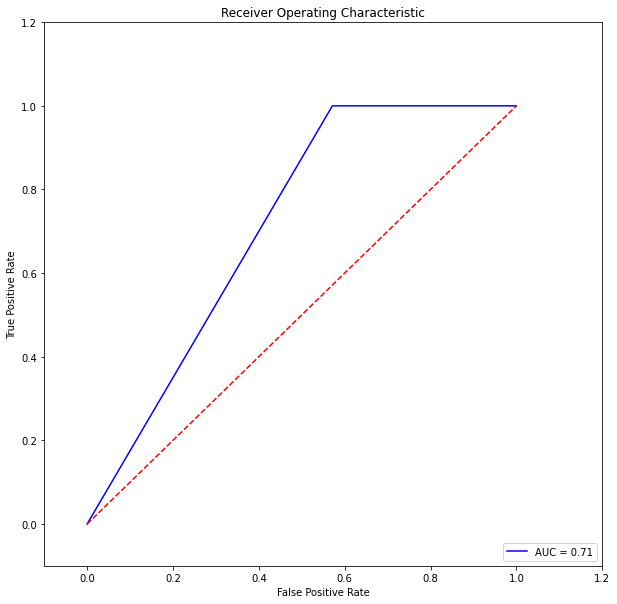

In [ ]:
# ROC for Logistic Regression
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


c:\Users\mosta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


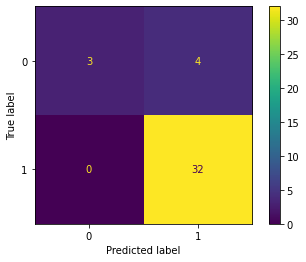

In [ ]:
#plot_confusion_matrix: Visualize confusion matrices
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, Y_test, display_labels=[0, 1])
plt.show()

### Desicion Tree Classifier

In [ ]:
# Desicion Tree Classifier
from sklearn.tree import DecisionTreeClassifier
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
Y_pred = tree.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(tree.score(X_test, Y_test)))
print('Accuracy of Decision Tree classifier on train set: {:.2f}'.format(tree.score(X_train, Y_train)))



[[ 3  4]
 [ 0 32]]
Accuracy of Decision Tree classifier on test set: 0.92
Accuracy of Decision Tree classifier on train set: 1.00


In [ ]:
# For Decision Tree
# import the metrics module for the confusion matrix
from tabulate import tabulate
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import r2_score
# print f1 ,rmse,mae, R2 , recall , Precision ,, train and test accuracy , in tabular format using tabulate target 1
print(tabulate([['f1_score', f1_score(Y_test, Y_pred, average='weighted')], ['mean_squared_error', mean_squared_error(Y_test, Y_pred)], ['mean_absolute_error', mean_absolute_error(Y_test, Y_pred)], ['r2_score', r2_score(Y_test, Y_pred)], ['recall_score', recall_score(Y_test, Y_pred, average='weighted')], ['precision_score', precision_score(Y_test, Y_pred, average='weighted')]], headers=['Metrics', 'Value']))



Metrics                  Value
-------------------  ---------
f1_score              0.794872
mean_squared_error    0.205128
mean_absolute_error   0.205128
r2_score             -0.392857
recall_score          0.794872
precision_score       0.794872


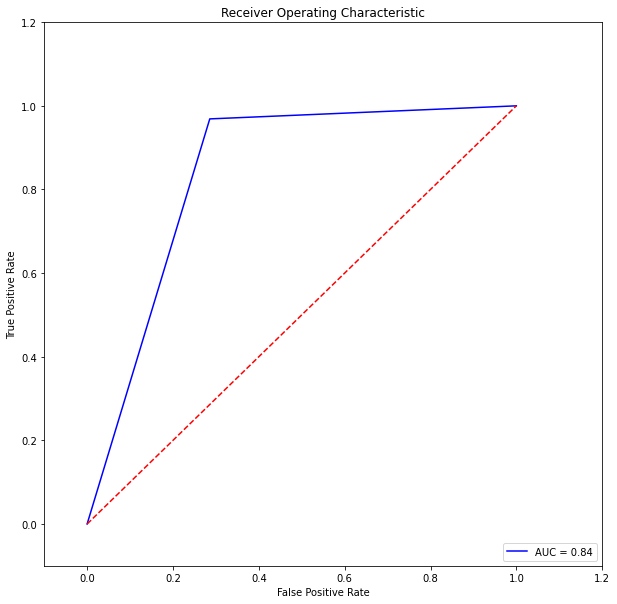

In [ ]:
#roc CURVE for Decision Tree Classifier
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

c:\Users\mosta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


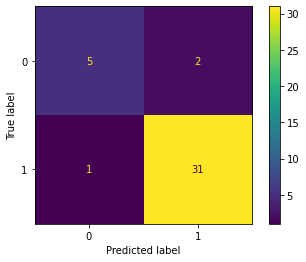

In [ ]:
# plot_confusion_matrix: Visualize confusion matrices 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree, X_test, Y_test, display_labels=[0, 1])
plt.show()



### KNN Classifier

In [ ]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test, Y_test)))
print('Accuracy of KNN classifier on train set: {:.2f}'.format(knn.score(X_train, Y_train)))


Accuracy of KNN classifier on test set: 0.79
Accuracy of KNN classifier on train set: 0.93


In [ ]:
# For Decision Tree
# import the metrics module for the confusion matrix
from tabulate import tabulate
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import r2_score
# print f1 ,rmse,mae, R2 , recall , Precision ,, train and test accuracy , in tabular format using tabulate for target 1
print(tabulate([['f1_score', f1_score(Y_test, Y_pred, average='weighted')], ['mean_squared_error', mean_squared_error(Y_test, Y_pred)], ['mean_absolute_error', mean_absolute_error(Y_test, Y_pred)], ['r2_score', r2_score(Y_test, Y_pred)], ['recall_score', recall_score(Y_test, Y_pred, average='weighted')], ['precision_score', precision_score(Y_test, Y_pred, average='weighted')]], headers=['Metrics', 'Value']))

Metrics                  Value
-------------------  ---------
f1_score              0.794872
mean_squared_error    0.205128
mean_absolute_error   0.205128
r2_score             -0.392857
recall_score          0.794872
precision_score       0.794872


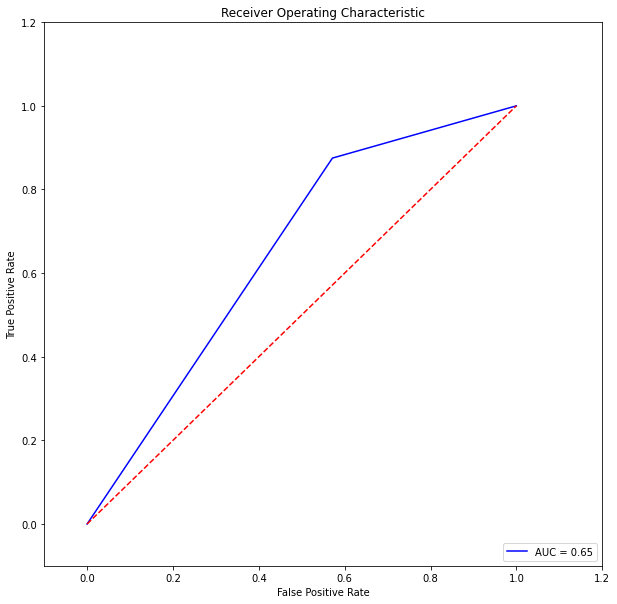

In [ ]:
# roc CURVE for KNN
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


c:\Users\mosta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


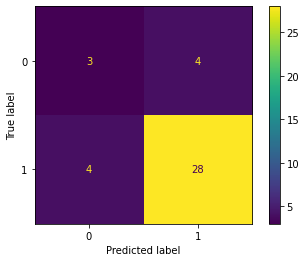

In [ ]:
# plot_confusion_matrix: Visualize confusion matrices
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, Y_test, display_labels=[0, 1])
plt.show()



### K-fold cross validation

In [ ]:
# Cross validation for KNN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, r2_score, mean_squared_error, mean_absolute_error
from tabulate import tabulate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X, Y, cv=10)
print("KNN_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
# f1,r2,rmse,mae scores in tabular form
print(tabulate([['f1', f1_score(Y_test, Y_pred)], ['R2', r2_score(Y_test, Y_pred)], ['rmse', mean_squared_error(
    Y_test, Y_pred)], ['mae', mean_absolute_error(Y_test, Y_pred)]], headers=['Metric', 'Score']))
# Cross validation for SVM
svm = SVC(kernel='linear')
scores = cross_val_score(svm, X, Y, cv=10)
print("SVM_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
# F1 ,R2 ,RMSE ,MAE scores in tabular form
print(tabulate([['f1', f1_score(Y_test, Y_pred)], ['r2', r2_score(Y_test, Y_pred)], ['rmse', mean_squared_error(
    Y_test, Y_pred)], ['mae', mean_absolute_error(Y_test, Y_pred)]], headers=['Metric', 'Score']))
# Cross validation for Decision Tree
tree = DecisionTreeClassifier()
scores = cross_val_score(tree, X, Y, cv=10)
print("Tree_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
# F1 ,R2 ,RMSE ,MAE scores in tabular form
print(tabulate([['f1', f1_score(Y_test, Y_pred)], ['r2', r2_score(Y_test, Y_pred)], ['rmse', mean_squared_error(
    Y_test, Y_pred)], ['mae', mean_absolute_error(Y_test, Y_pred)]], headers=['Metric', 'Score']))
# Cross validation for logistic regression
logreg = LogisticRegression()
scores = cross_val_score(logreg, X, Y, cv=10)
print("Logistic_Accuracy: %0.2f (+/- %0.2f)" %
      (scores.mean(), scores.std() * 2))
# F1 ,R2 ,RMSE ,MAE scores in tabular form
print(tabulate([['f1', f1_score(Y_test, Y_pred)], ['r2', r2_score(Y_test, Y_pred)], ['rmse', mean_squared_error(
    Y_test, Y_pred)], ['mae', mean_absolute_error(Y_test, Y_pred)]], headers=['Metric', 'Score']))


KNN_Accuracy: 0.74 (+/- 0.21)
Metric        Score
--------  ---------
f1        0.953846
R2        0.477679
rmse      0.0769231
mae       0.0769231
SVM_Accuracy: 0.83 (+/- 0.20)
Metric        Score
--------  ---------
f1        0.953846
r2        0.477679
rmse      0.0769231
mae       0.0769231
Tree_Accuracy: 0.79 (+/- 0.28)
Metric        Score
--------  ---------
f1        0.953846
r2        0.477679
rmse      0.0769231
mae       0.0769231


c:\Users\mosta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mosta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Logistic_Accuracy: 0.82 (+/- 0.20)
Metric        Score
--------  ---------
f1        0.953846
r2        0.477679
rmse      0.0769231
mae       0.0769231


c:\Users\mosta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best model is SVM 


In [ ]:
# SVM Classifier
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)
# accuracy
svm_model = svm.SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, Y_train)
Y_pred = svm_model.predict(X_test)
print("Accuracy of SVM classifier on test set: {:.2f}".format(
    svm_model.score(X_test, Y_test)))
print("Accuracy of SVM classifier on train set: {:.2f}".format(
    svm_model.score(X_train, Y_train)))


Accuracy of SVM classifier on test set: 0.87
Accuracy of SVM classifier on train set: 0.87


### ROC curve and AUC score

ROC AUC: 0.70


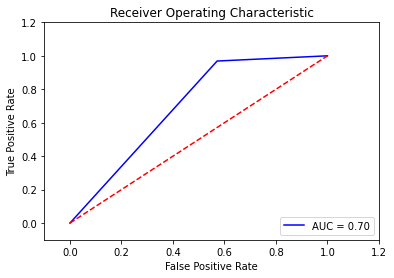

In [ ]:
# ROC curve and AUC score
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC AUC: %0.2f" % roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
            label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.2])
plt.ylim([-0.1, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### PCA for dimensionality reduction

In [ ]:
#PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print("Original shape:   ", X.shape)
print("Reduced shape:    ", X_pca.shape)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, s=50, cmap='viridis')
plt.show()


Original shape:    (195, 22)
Reduced shape:     (195, 2)


#### Training the SVM model on the Training and Test set


In [15]:
# Training the SVM model on the Training and Test set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)   
classifier.fit(X_train, Y_train)
# Predicting the Test set results
Y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[ 3  4]
 [ 1 31]]


### Prediction by inputting the values

In [ ]:
# Paekinson Prediction
import numpy as np
# Test data getting predicted from the user input
input_data = np.array([197.07600, 206.89600, 192.05500, 0.00289, 0.00001, 0.00166, 0.00168, 0.00498, 0.01098, 0.09700,
0.00563, 0.00680, 0.00802, 0.01689, 0.00339, 26.77500, 0.422229, 0.741367, -7.348300, 0.177551, 1.743867, 0.085569])
input_data = input_data.reshape(1, -1)
# Predicting the Test set results
Y_pred = classifier.predict(input_data)
print(Y_pred)
if Y_pred == 1:
    print("The person is suffering from Parkinson's disease")
else:
    print("The person is not suffering from Parkinson's disease")

[0]
The person is not suffering from Parkinson's disease


c:\Users\mosta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


### Saving the model

In [34]:
import pickle

In [44]:
data = {"model": classifier, "MDVP: Fo(Hz)": 'MDVP: Fo(Hz)', "MDVP: Fhi(Hz)": 'MDVP: Fhi(Hz)', "MDVP: Flo(Hz)": 'MDVP: Flo(Hz)', "MDVP: Jitter(%)": 'MDVP: Jitter(%)', "MDVP: Jitter(Abs)": 'MDVP: Jitter(Abs)', "MDVP: Rap": 'MDVP: Rap', "MDVP: PPQ": 'MDVP: PPQ', "Jitter: DDP": 'Jitter: DDP', "MDVP: Shimmer": 'MDVP: Shimmer', "MDVP: Shimmer(dB)": 'MDVP: Shimmer(dB)', "Shimmer: APQ3": 'Shimmer: APQ3', "Shimmer: APQ5": 'Shimmer: APQ5', "MDVP: APQ": 'MDVP: APQ', "Shimmer: DDA": 'Shimmer: DDA', "NHR": 'NHR', "HNR": 'HNR', "status": 'status', "RPDE": 'RPDE', "DFA": 'DFA', "spread1": 'spread1', "spread2": 'spread2', "D2": 'D2', "PPE": 'PPE'}

In [66]:
with open('saved_steps_parkinsons.pkl', 'wb') as file:
  pickle.dump(data, file)


In [67]:
with open('saved_steps_parkinsons.pkl', 'rb') as file:
  data = pickle.load(file)


In [68]:
model1_loaded = data["model"]
"MDVP: Fo(Hz)" == data["MDVP: Fo(Hz)"]
"MDVP: Fhi(Hz)" == data["MDVP: Fhi(Hz)"]
"MDVP: Flo(Hz)" == data["MDVP: Flo(Hz)"]
"MDVP: Jitter(%)" == data["MDVP: Jitter(%)"]
"MDVP: Jitter(Abs)" == data["MDVP: Jitter(Abs)"]
"MDVP: Rap" == data["MDVP: Rap"]
"MDVP: PPQ" == data["MDVP: PPQ"]
"Jitter: DDP" == data["Jitter: DDP"]
"MDVP: Shimmer" == data["MDVP: Shimmer"]
"MDVP: Shimmer(dB)" == data["MDVP: Shimmer(dB)"]
"Shimmer: APQ3" == data["Shimmer: APQ3"]
"Shimmer: APQ5" == data["Shimmer: APQ5"]
"MDVP: APQ" == data["MDVP: APQ"]
"Shimmer: DDA" == data["Shimmer: DDA"]
"NHR" == data["NHR"]
"HNR" == data["HNR"]

"RPDE" == data["RPDE"]
"DFA" == data["DFA"]
"spread1" == data["spread1"]
"spread2" == data["spread2"]
"D2" == data["D2"]
"PPE" == data["PPE"]


True

In [49]:
prediction_on_saved_model1 = model1_loaded.predict(X_test)
prediction_on_saved_model1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [50]:
X_test.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
138,112.239,126.609,104.095,0.00472,0.00004,0.00238,0.00290,0.00715,0.05643,0.517,...,0.04451,0.09211,0.02629,17.366,0.640945,0.701404,-5.634576,0.306014,2.419253,0.209191
16,144.188,349.259,82.764,0.00544,0.00004,0.00211,0.00292,0.00632,0.02047,0.192,...,0.02074,0.02908,0.01859,22.333,0.567380,0.644692,-5.440040,0.239764,2.264501,0.218164
155,117.870,127.349,95.654,0.00647,0.00005,0.00356,0.00300,0.01067,0.03087,0.276,...,0.02402,0.04977,0.02631,22.431,0.628300,0.652025,-3.583722,0.207914,2.439597,0.206256
96,159.116,168.913,144.811,0.00342,0.00002,0.00178,0.00184,0.00535,0.03381,0.307,...,0.02809,0.05417,0.00852,22.663,0.366329,0.693429,-6.417440,0.194627,2.473239,0.151709
68,143.533,162.215,65.809,0.01101,0.00008,0.00647,0.00467,0.01941,0.05384,0.478,...,0.03392,0.09455,0.04882,20.338,0.513237,0.731444,-5.869750,0.151814,2.118496,0.185580


In [57]:
# Accuracy of the model
print("Accuracy of the model is:")
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, prediction_on_saved_model1)*100



Accuracy of the model is:


87.17948717948718